# 911 Calls Capstone Project

For this capstone project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy and pandas **

In [96]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


** Read in the csv file as a dataframe called df **

In [5]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [33]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [14]:
df['zip'].head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

** What are the top 5 townships (twp) for 911 calls? **

In [17]:
df['twp'].head(5)

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

** Take a look at the 'title' column, how many unique title codes are there? **

In [18]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I have used .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [20]:
df['reason']=df['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [21]:
df['reason'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='reason', ylabel='count'>

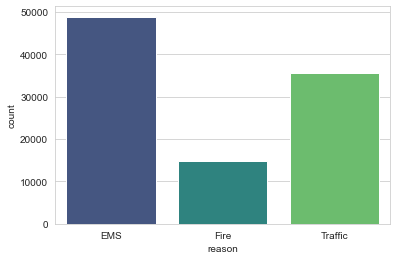

In [22]:
sns.countplot(x='reason', data=df, palette = 'viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [29]:
type(df['timeStamp'].iloc[0])

str

** Since these timestamps are still strings, I have used [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [32]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

    ** I can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Now that the timestamp column are actually DateTime objects,I have used .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [43]:
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['WeekDay'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df['Month']= df['timeStamp'].apply(lambda time:time.month)
print(df)

             lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...  19003.0   
99489 

** Notice how the Day of Week is an integer 0-6. I Used the .map() with this dictionary to map the actual string names to the day of the week: **

    

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [46]:
df['WeekDay'] = df['WeekDay'].map(dmap)

** using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

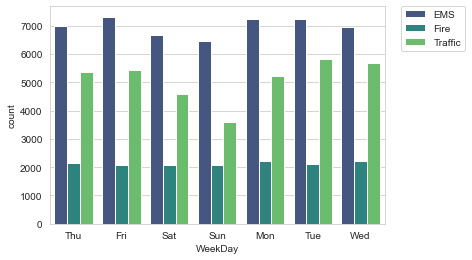

In [54]:
sns.countplot(x='WeekDay',data=df,hue='reason',palette='viridis')
#Relocating the legend for proper visibility of the plot
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Now do the same for Month:**

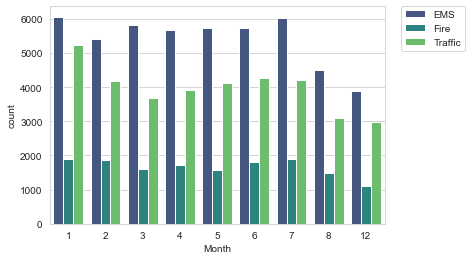

In [59]:
sns.countplot(x='Month',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** The plot above is missing 9,10 and 11th month, I used a simple line plot to fill the missing data.

I have grouped the data by the month with a count function for aggregation.

In [100]:
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,WeekDay,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

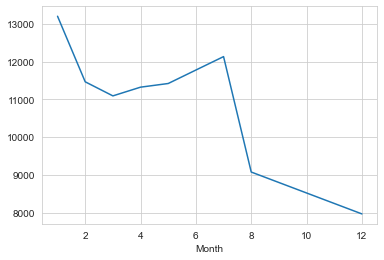

In [101]:
byMonth['twp'].plot()

** Using the seaborn's lmplot() to create a linear fit on the number of calls per month. Resetting the index to column. **

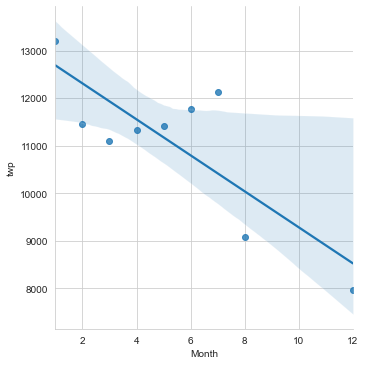

In [102]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [72]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

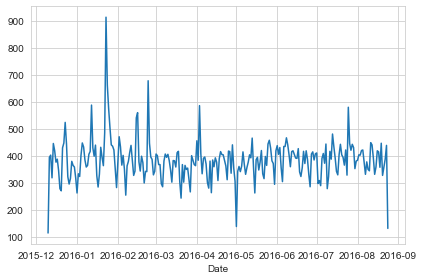

In [73]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** creating 3 separate plots with each plot representing a Reason for the 911 call**

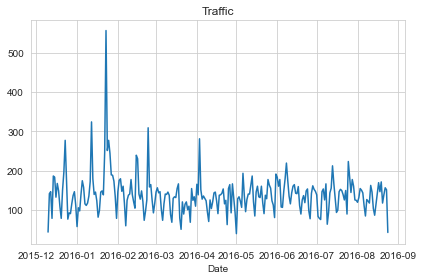

In [103]:
df[df['reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

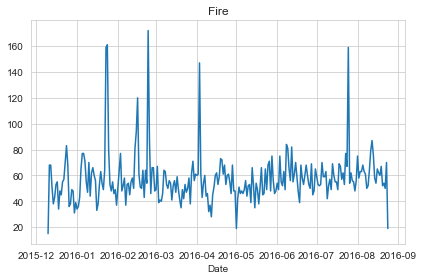

In [104]:
df[df['reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

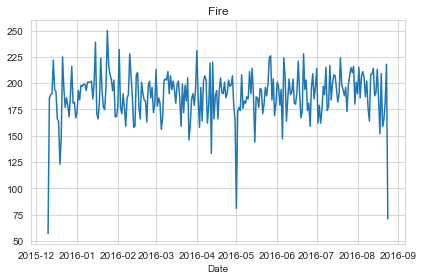

In [105]:
df[df['reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

____
**For creating heatmaps I first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I have combined the groupby method with the unstack https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html method.

In [84]:
dayhour = df.groupby(by=['WeekDay','hour']).count()['reason'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDay,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** creating a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='hour', ylabel='WeekDay'>

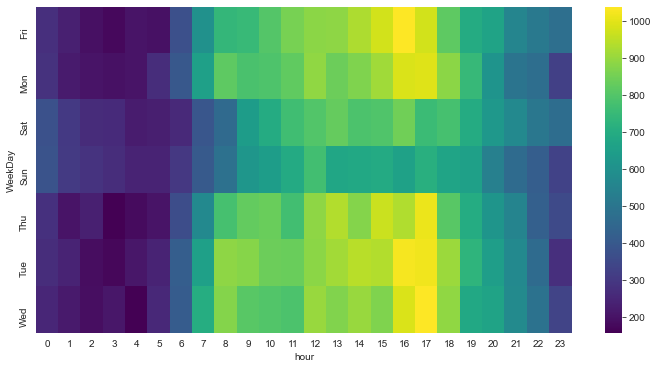

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

** creating a clustermap using this DataFrame. **

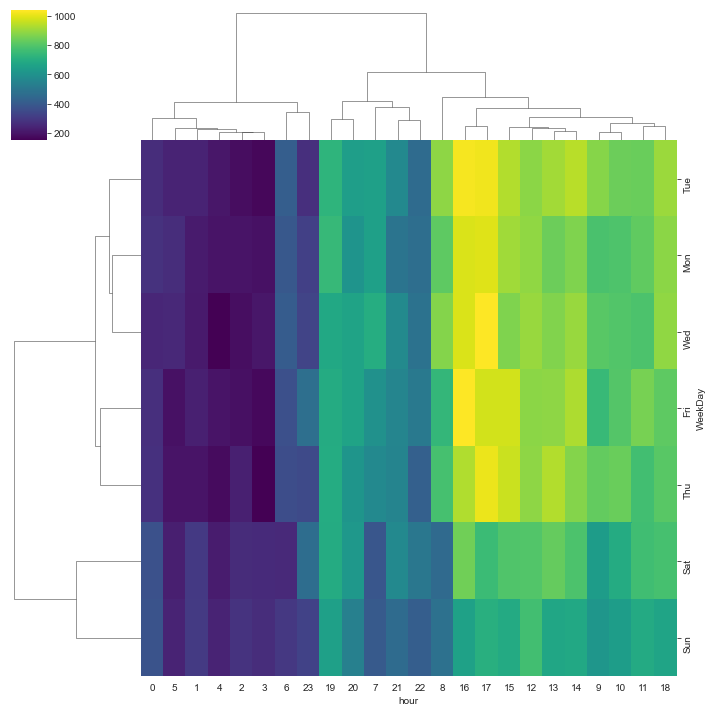

In [89]:
sns.clustermap(dayhour, cmap='viridis')

** repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [106]:
byMonth = df.groupby(by = ['WeekDay','Month']).count()['reason'].unstack()
byMonth.head()

Month,1,2,3,4,5,6,7,8,12
WeekDay,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='WeekDay'>

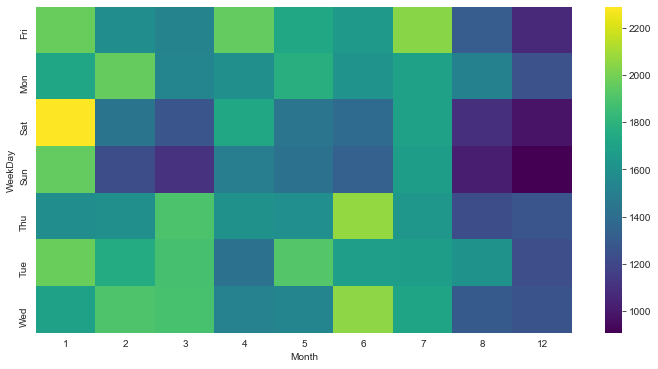

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(byMonth,cmap='viridis')

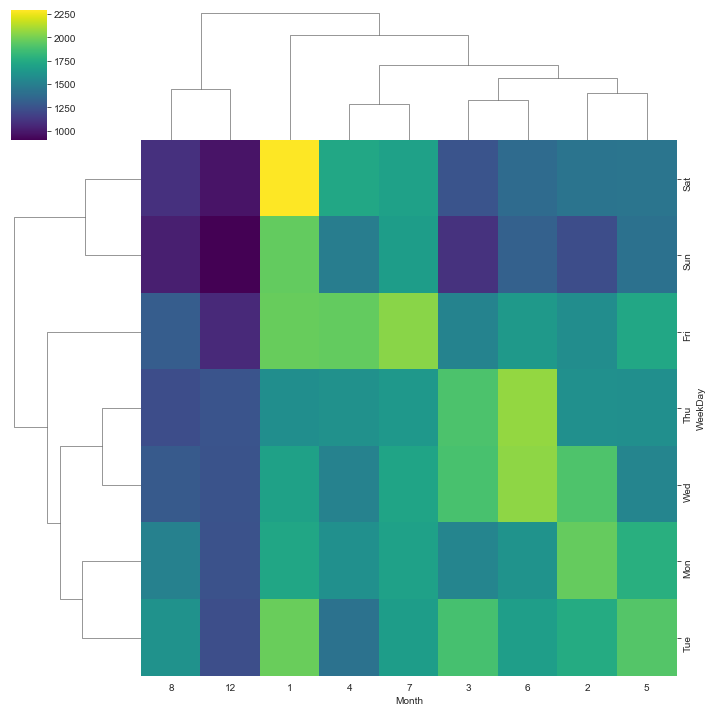

In [108]:
sns.clustermap(byMonth, cmap ='viridis')